# Objectives:

### Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.
### In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

# Downloading the dataset

In [ ]:
%pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! kaggle datasets download yashpaloswal/ann-car-sales-price-prediction

  0% 0.00/29.0k [00:00<?, ?B/s]
100% 29.0k/29.0k [00:00<00:00, 44.3MB/s]


In [ ]:
!unzip /content/ann-car-sales-price-prediction.zip -d /content/

Archive:  /content/ann-car-sales-price-prediction.zip
  inflating: /content/car_purchasing.csv  


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

# Reading & Understanding the data

In [ ]:
data = pd.read_csv('/content/car_purchasing.csv',encoding='ISO-8859-1')

In [ ]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


# Checking for missing data

In [ ]:
data.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

# Data Preprocessing

In [ ]:
data.drop(columns= ['customer name' , 'customer e-mail' ,'country'] , axis = 1 , inplace = True)

### In the dataset, 'customer name', 'customer e-mail', and 'country'  are not likely to provide any significant information for analysis or modeling because they have a limited ability to discriminate between data points.
### By dropping these columns, I can simplify the dataset and reduce its dimensionality, which may improve the performance of machine learning models and reduce computational overhead.


In [ ]:
data.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
X = data.drop('car purchase amount' , axis= 1)
y = data['car purchase amount']

# EDA

In [ ]:
import plotly.express as px
fig = px.scatter(data, x="annual Salary", y="credit card debt",  title="Credit Card Debt vs Annual Salary")
fig.update_traces(marker_size=10)
fig.show()

In [ ]:
fig = px.scatter(data, x="annual Salary", y="car purchase amount",  title="Car Purchase Amount vs Annual Salary")
fig.update_traces(marker_size=10)
fig.show()

# Data Scaling

In [ ]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1 , 1))

# Model Building

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 42)

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=5))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train , y_train , epochs = 100 , validation_split= 0.2)

Epoch 1/100
10/10 [==============================] - 1s 29ms/step - loss: 0.0614 - mean_absolute_error: 0.2159 - val_loss: 0.0326 - val_mean_absolute_error: 0.1620
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0293 - mean_absolute_error: 0.1400 - val_loss: 0.0172 - val_mean_absolute_error: 0.1008
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.1089 - val_loss: 0.0168 - val_mean_absolute_error: 0.0921
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.1019 - val_loss: 0.0153 - val_mean_absolute_error: 0.0896
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0153 - mean_absolute_error: 0.0961 - val_loss: 0.0125 - val_mean_absolute_error: 0.0814
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0903 - val_loss: 0.0109 - val_mean_absolute_error: 0.0760
Epoch 7/100
10/10 [==

In [ ]:
training_accuracy = history.history['mean_absolute_error']
training_loss = history.history['loss']
validation_accuracy = history.history['val_mean_absolute_error']
validation_loss = history.history['val_loss']

best_loss_epoch_index = np.argmin(validation_loss)
lowest_validation_loss = validation_loss[best_loss_epoch_index]

best_accuracy_epoch_index = np.argmin(validation_accuracy)
highest_validation_accuracy = validation_accuracy[best_accuracy_epoch_index]

epochs = [i+1 for i in range(len(training_accuracy))]

loss_label = f'Best Loss Epoch = {str(best_loss_epoch_index + 1)}'
accuracy_label = f'Best Accuracy Epoch = {str(best_accuracy_epoch_index + 1)}'


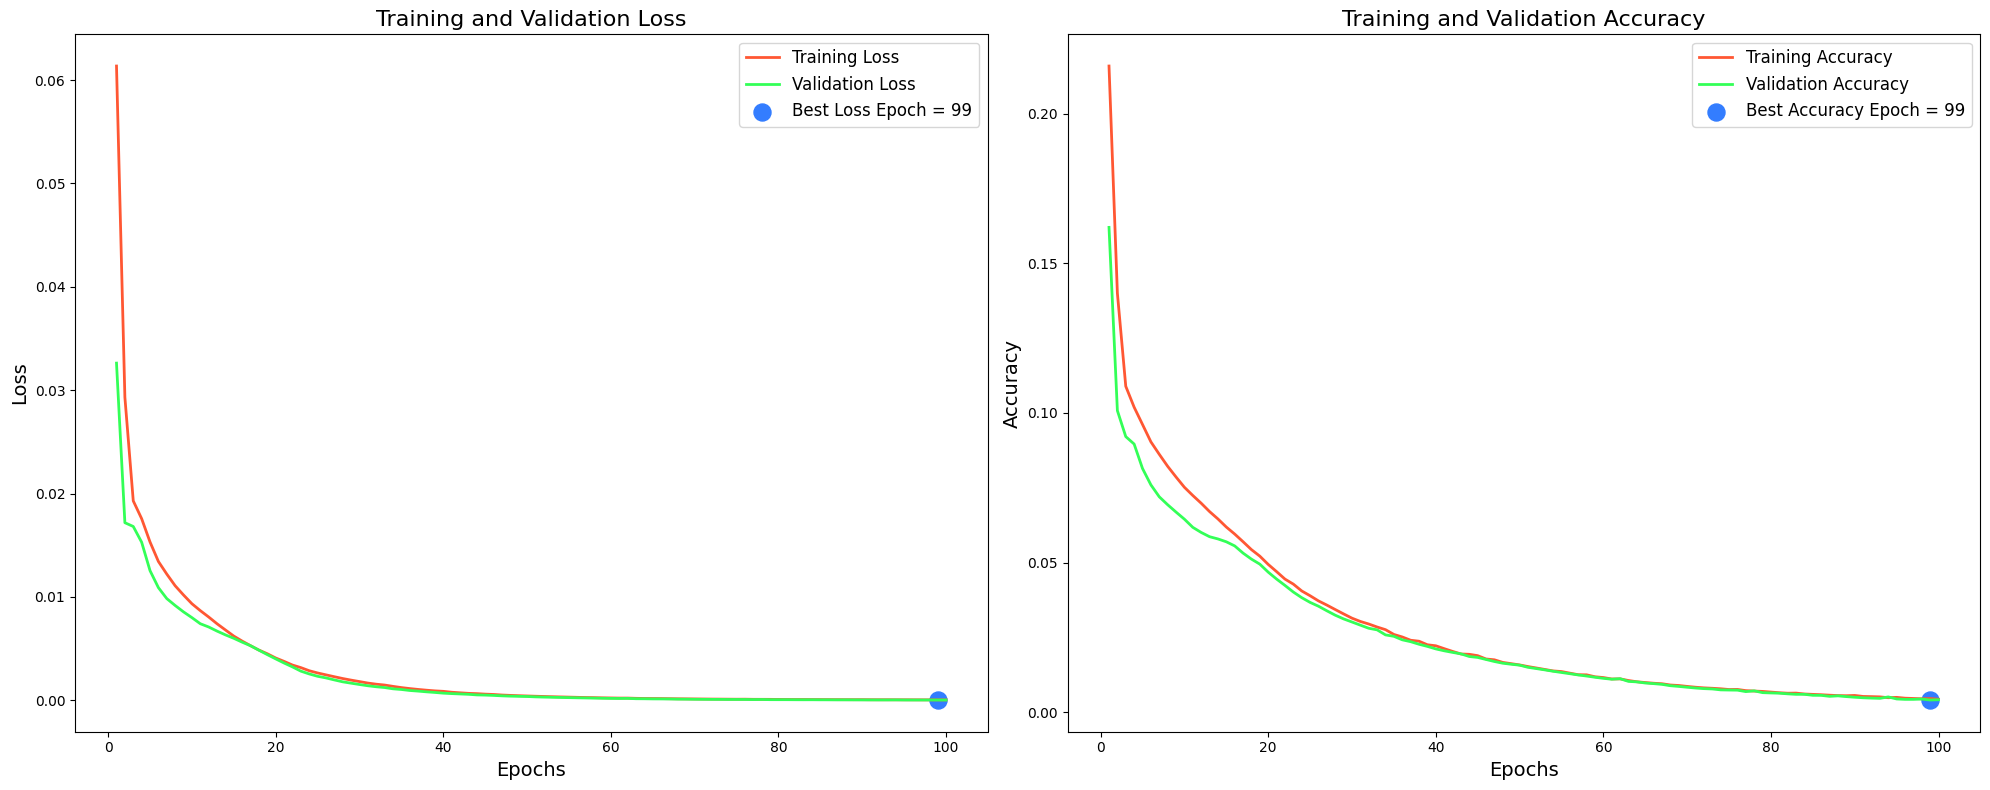

In [ ]:
fig, axes = plt.subplots(figsize=(20, 8))

# Subplot 1: Training and Validation Loss
ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, color='#FF5733', label='Training Loss', linewidth=2)
plt.plot(epochs, validation_loss, color='#33FF57', label='Validation Loss', linewidth=2)
plt.scatter(best_loss_epoch_index + 1, lowest_validation_loss, s=150, c='#337DFF', marker='o', label=loss_label)
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)

# Subplot 2: Training and Validation Accuracy
ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, color='#FF5733', label='Training Accuracy', linewidth=2)
plt.plot(epochs, validation_accuracy, color='#33FF57', label='Validation Accuracy', linewidth=2)
plt.scatter(best_accuracy_epoch_index + 1, highest_validation_accuracy, s=150, c='#337DFF', marker='o', label=accuracy_label)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import r2_score

score = r2_score(y_test , y_pred)
print(f'R2 Score = {score}')

R2 Score = 0.998640545447279


# Conclusion:

## 1. The dataset provided has no null values, and there is no need for feature extraction or extensive data preprocessing steps.
## 2. The data has been scaled using Min-Max Scaling.
## 3. With features such as gender, age, annual salary, credit card debt, and net worth, the artificial neural network achieved a very high accuracy in predicting car sales prices, with a final R2 score of approximately 0.998.
## 4. This score indicates that the model performed exceptionally well in predicting car sales prices on the test data